# 3D Printer DataSet for Mechanical Engineers

Import Data

In [58]:
import pandas as pd
data = pd.read_csv("data.csv", sep = ",")

In [59]:
data.head()

layer_height  wall_thickness  infill_density infill_pattern  \
0          0.02               8              90           grid   
1          0.02               7              90      honeycomb   
2          0.02               1              80           grid   
3          0.02               4              70      honeycomb   
4          0.02               6              90           grid   

   nozzle_temperature  bed_temperature  print_speed material  fan_speed  \
0                 220               60           40      abs          0   
1                 225               65           40      abs         25   
2                 230               70           40      abs         50   
3                 240               75           40      abs         75   
4                 250               80           40      abs        100   

   roughness  tension_strenght  elongation  
0         25                18         1.2  
1         32                16         1.4  
2         40                 8         0.8  
3         68                10         0.5  
4         92                 5         0.7

In [60]:
data.isnull().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

Good for us that there are no "nan" or "null" values

In [61]:
for column in data.columns:
    print("{} : {}".format(column,data[column].unique()))

layer_height : [0.02 0.06 0.1  0.15 0.2 ]
wall_thickness : [ 8  7  1  4  6 10  5  9  2  3]
infill_density : [90 80 70 40 10 20 50 30 60]
infill_pattern : ['grid' 'honeycomb']
nozzle_temperature : [220 225 230 240 250 200 205 210 215]
bed_temperature : [60 65 70 75 80]
print_speed : [ 40  60 120]
material : ['abs' 'pla']
fan_speed : [  0  25  50  75 100]
roughness : [ 25  32  40  68  92  60  55  21  24  30  75 118 200 220 126 145  88  74
 120 144 265 312 368 180 176 128 138 121 168 154 225 289 326 192 212 172
 163 276 298 360 357 321 278 244]
tension_strenght : [18 16  8 10  5 24 12 14 27 25 37  9 23 26 33 29 19 11 34 13 22  4 35 28
 21 30]
elongation : [1.2 1.4 0.8 0.5 0.7 1.1 1.3 1.5 1.7 2.4 1.  2.2 1.9 1.6 2.1 2.  0.9 0.4
 1.8 2.9 0.6 2.8 2.3 3.3 3.1 2.7 3.2]


Converting categorical variable to Numerical

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = data.copy()
df["infill_pattern"] = le.fit_transform(data["infill_pattern"])
df["material"] = le.fit_transform(data["material"])

        

In [63]:
df.head()

layer_height  wall_thickness  infill_density  infill_pattern  \
0          0.02               8              90               0   
1          0.02               7              90               1   
2          0.02               1              80               0   
3          0.02               4              70               1   
4          0.02               6              90               0   

   nozzle_temperature  bed_temperature  print_speed  material  fan_speed  \
0                 220               60           40         0          0   
1                 225               65           40         0         25   
2                 230               70           40         0         50   
3                 240               75           40         0         75   
4                 250               80           40         0        100   

   roughness  tension_strenght  elongation  
0         25                18         1.2  
1         32                16         1.4  
2         40                 8         0.8  
3         68                10         0.5  
4         92                 5         0.7

Now we can see how features affect eachother through correlation matrix

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)


In [0]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [9]:
import seaborn as sns

sns.pairplot(df)

Above matrix and graph shows that **layer height** ,*nozzle temperature*, *bed temperature*, *print speed*, *fan speed* affect the output variables.

Some variables for ex **bed temperature**,**nozzle temperature** and **fan speed** are **linearly dependent** and can be combined but, for using FFN we can allow all variables , later we can try dropping some linearly dependent variables

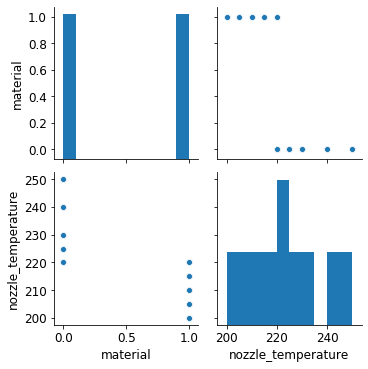

In [10]:
 sns.pairplot(df,vars=["material", "nozzle_temperature"])

- Above plot shows that , **nozzle temperature** would be a deciding factor in predicting material type
- It means that if material is **abs** then nozzle temperature reaches to higher level in comparision to when material is **pla** 

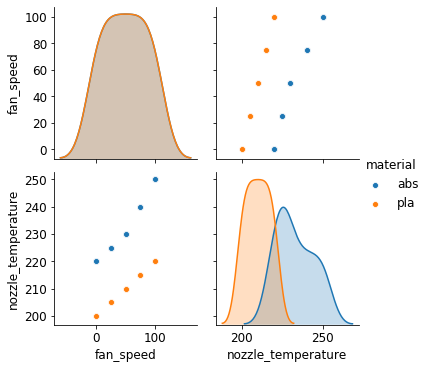

In [11]:
 sns.pairplot(data,vars=["fan_speed", "nozzle_temperature"],diag_kind="kde",hue="material")

-Above plot clearly shows that cooling is not very effective in **abs** because the nozzle_temperature is increasing at a higher rate

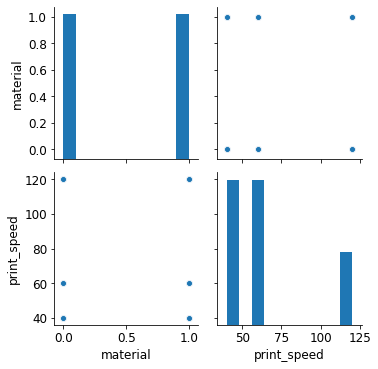

In [14]:
 sns.pairplot(df,vars=["material", "print_speed"])

In [0]:
y_data = df.material.values
x_data = df.drop(["material","print_speed","infill_pattern","bed_temperature","layer_height"],axis=1)

**Dropping all the variables which have 0 correlation with material , it would also reduce the computation time**

 3 nn score: 0.7333333333333333 
 1 nn score: 0.8 
 2 nn score: 0.6666666666666666 
 3 nn score: 0.7333333333333333 
 4 nn score: 0.6666666666666666 
 5 nn score: 0.8 
 6 nn score: 0.7333333333333333 
 7 nn score: 0.6666666666666666 


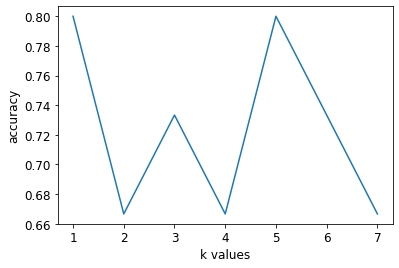

In [16]:
# normalization 
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_norm = mm.fit_transform(x_data)

# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm,y_data,test_size = 0.3,random_state=1)





from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

score_list = []
for each in range(1,8):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    print(" {} nn score: {} ".format(each,knn2.score(x_test,y_test)))
    
plt.plot(range(1,8),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Input, Dense, Flatten
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization

y = df.material.values
x = df.drop(["material"],axis=1)
x_norm = mm.fit_transform(x)

model = Sequential()
model.add(Dense(32,input_dim=11))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(16))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_norm,y, epochs=500, batch_size =32, validation_split= 0.20)

Train on 40 samples, validate on 10 samples
Epoch 1/500
40/40 [==============================] - 1s 17ms/step - loss: 3.6495 - acc: 0.0000e+00 - val_loss: 4.0714 - val_acc: 0.0000e+00
Epoch 2/500
40/40 [==============================] - 0s 180us/step - loss: 3.4060 - acc: 0.0000e+00 - val_loss: 3.8279 - val_acc: 0.0000e+00
Epoch 3/500
40/40 [==============================] - 0s 181us/step - loss: 3.4246 - acc: 0.0000e+00 - val_loss: 3.6215 - val_acc: 0.0000e+00
Epoch 4/500
40/40 [==============================] - 0s 165us/step - loss: 3.1945 - acc: 0.0250 - val_loss: 3.3949 - val_acc: 0.0000e+00
Epoch 5/500
40/40 [==============================] - 0s 282us/step - loss: 3.1728 - acc: 0.0000e+00 - val_loss: 3.1755 - val_acc: 0.0000e+00
Epoch 6/500
40/40 [==============================] - 0s 232us/step - loss: 3.0649 - acc: 0.0750 - val_loss: 2.9919 - val_acc: 0.0000e+00
Epoch 7/500
40/40 [==============================] - 0s 229us/step - loss: 3.0037 - acc: 0.0750 - val_loss: 2.8154 - va

In [23]:
import numpy as np

a1 = 4 #layer_height*100
a2 = 5 #wall_thickness
a3 = 60 #infill_density
a4 = 0 #infilkk_pattern
a5 = 232 #nozzle_temperature 
a6 = 74 #bed_temperature
a7 = 90 #print_speed
a8 = 100 #fan_speed
a9 = 150 #roughness
a10 = 30 #tension_strenght
a11 = 200 #elangation*100

tahmin = np.array([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11]).reshape(1,11)
print(model.predict_classes(tahmin))

if model.predict_classes(tahmin) == 0: 
    print("Material is ABS")
else:   
    print("Material is PLA.")

[0]
Material is ABS


This prediction could have also been easily made looking at the Nozzle temperature only, I don't understand why this problem is being solved with ANN when actually a Decision Tree classifier could have been used easily to predict the material used as input, it was told in **About this data** on kaggle
